# Course Name: Introduction to Computer Vision
# Authors: Aryaa Singh, Manjusha Mishra 
# Date: 02/25/21
# Class Exercise 2 - EDGE DETECTION using Sobel Operator!

In [ ]:
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

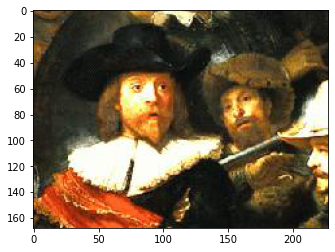

In [ ]:
# please download any image or you may use this link: https://github.com/Hoya-kim/Image-warping-stitching/tree/master/images 
f1 = plt.imread('nachtwacht1.jpg')
plt.imshow(f1); plt.show()

In [ ]:
# Applying Sobel Operator 
# 1. Assuming that the image to be operated is I:
    # a. Horizontal changes: 
    #     This is computed by convolving I with a kernel Gx with odd size. 
    #     For example for a kernel size of 3, Gx would be computed as:
    #     Gx = [[-1 0 1]
    #           [-2 0 2]    * I
    #           [-1 0 1]]

    # b. Vertical changes: 
    #     This is computed by convolving I with a kernel Gy with odd size. 
    #     For example for a kernel size of 3, Gy would be computed as:
    #     Gy = [[-1 -2 1]
    #           [ 0  0 0]    * I
    #           [ 1  2 1]]

# 2. At each point of the image we calculate an approximation of the gradient in that point by combining both results above:
    # G= magnitude resulting from Gx and Gy


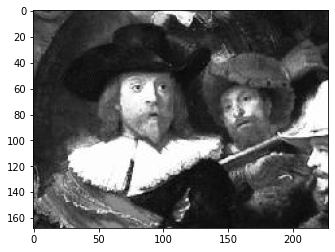

In [ ]:
img_gray = cv2.imread('nachtwacht1.jpg', 0) # Load the color image in grayscale
plt.imshow(img_gray,cmap='gray'); plt.show()

In [ ]:
img = cv2.GaussianBlur(img_gray,(5,5),0) # Apply Gaussian filter to remove noise

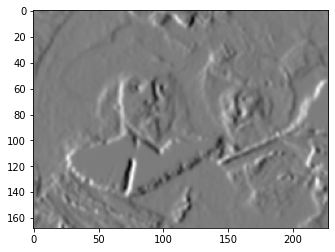

In [ ]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3) # Apply sobel operator in x-direction
plt.imshow(sobelx, cmap='gray'); plt.show()

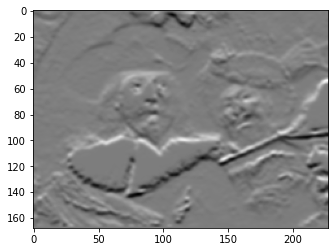

In [ ]:
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3) # Apply sobel operator in y-direction
plt.imshow(sobely, cmap='gray'); plt.show()

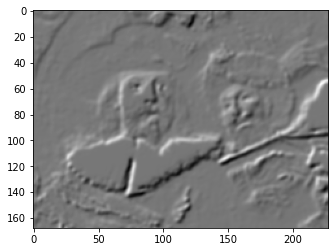

In [ ]:
final_img = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0) # Get the magnitude of resultant images
plt.imshow(final_img, cmap='gray'); plt.show()

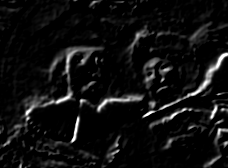

In [ ]:
cv2_imshow(final_img) # Final Resultant Image with Detetcted Edges!!

In [ ]:
# Your task is to implement sobel operator on an image to detect edges without using any inbuilt function for a 3 X 3 kernel

In [ ]:
import numpy as np

In [ ]:
Gx = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])

Gy = np.array([[-1, -2, -1],
               [0, 0, 0],
               [1, 2, 1]])

In [ ]:
# Part of a solution!! ----------------------------
def applySobel(img, Gx, Gy):
    '''write your code here '''
    from numpy.lib.stride_tricks import as_strided
    
    row, col = img.shape[0], img.shape[1]

    result_img = np.zeros((row,col), dtype=float)
    
    padded_image = np.pad(img, 1, 'constant', constant_values=(0, 0))
    i,j = 0,0
    
    stride_mat = as_strided( # Using numpy stride tricks to subdivide the original image to perform convolution
        padded_image,
        shape=( padded_image.shape[0] - Gx.shape[0] + 1, padded_image.shape[1] - Gx.shape[1] + 1, Gx.shape[0], Gx.shape[1],),
        strides=( padded_image.strides[0], padded_image.strides[1], padded_image.strides[0], padded_image.strides[1],),
        writeable=False,)
    
    for row in stride_mat:
        for cell in row:
            # Applying derivative kernels in both the direction
            sum_x_gradient = np.sum(np.multiply(Gx, cell))
            sum_y_gradient = np.sum(np.multiply(Gy, cell))

            # calculating magnitude
            result_img[j, i] = np.hypot(sum_x_gradient, sum_y_gradient)
            i += 1
        i = 0
        j += 1

    # Normalizing the resultant image
    result_img *= 255.0 / np.max(result_img)
    return result_img

In [ ]:
ans = applySobel(img, Gx, Gy) #img : grayscaled image, Gx and Gy

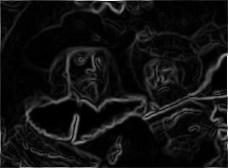

In [ ]:
# Display your image
cv2_imshow(ans)

In [ ]:
# Thank you!